In [60]:
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Data Preprocessing
Reading, processing and summarizing data

In [41]:
# Reading file and displaying first rows to see the structure of data
work_experience = pd.read_excel('files/work_experience.xlsx', sheet_name = 1)
work_experience.head()

,Kod,Nazwa,Miesiące,Płeć,Staż pracy,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,ogółem,2021,1090365,osoba,
1,0,POLSKA,styczeń,ogółem,ogółem,2022,927112,osoba,
2,0,POLSKA,styczeń,ogółem,ogółem,2023,857589,osoba,
3,0,POLSKA,styczeń,ogółem,ogółem,2024,837063,osoba,
4,0,POLSKA,styczeń,ogółem,do 1 roku,2021,222627,osoba,


In [42]:
# Viewing columns and their datatypes
work_experience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              1152 non-null   int64 
 1   Nazwa            1152 non-null   object
 2   Miesiące         1152 non-null   object
 3   Płeć             1152 non-null   object
 4   Staż pracy       1152 non-null   object
 5   Rok              1152 non-null   int64 
 6   Wartosc          1152 non-null   object
 7   Jednostka miary  1152 non-null   object
 8   Atrybut          1152 non-null   object
dtypes: int64(2), object(7)
memory usage: 81.1+ KB


In [43]:
# Viewing unique values for each column
for col in work_experience:
    print(f"{col}:{work_experience[col].unique()}")

Kod:[0]
Nazwa:['POLSKA']
Miesiące:['styczeń' 'luty' 'marzec' 'kwiecień' 'maj' 'czerwiec' 'lipiec' 'sierpień'
 'wrzesień' 'październik' 'listopad' 'grudzień']
Płeć:['ogółem' 'kobiety' 'mężczyźni']
Staż pracy:['ogółem' 'do 1 roku' '1-5' '5-10' '10-20' '20-30' 'powyżej 30 lat'
 'bez stażu pracy']
Rok:[2021 2022 2023 2024]
Wartosc:[1090365 927112 857589 837063 222627 192129 177061 175909 280510 236887
 219907 215517 170651 148637 137175 137466 162337 139469 127556 123977
 87190 71757 64065 60522 33393 26401 23142 21431 133657 111832 108683
 102241 583351 495959 458269 437618 129823 111995 104325 101396 160978
 136598 124804 119512 92777 80602 72848 71257 79183 67651 60849 57985
 33202 27198 24284 22851 9369 7119 6143 5698 78019 64796 65016 58919
 507014 431153 399320 399445 92804 80134 72736 74513 119532 100289 95103
 96005 77874 68035 64327 66209 83154 71818 66707 65992 53988 44559 39781
 37671 24024 19282 16999 15733 55638 47036 43667 43322 1099538 921760
 864781 '-' 227058 192128 180709

In [44]:
# Cleaning up data - drop null data and irrelevant columns
work_experience = work_experience[work_experience['Atrybut'] != 'n']
work_experience.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
work_experience.rename(columns={'Wartosc': 'Osoby'}, inplace=True)
work_experience.head()

,Miesiące,Płeć,Staż pracy,Rok,Osoby
0,styczeń,ogółem,ogółem,2021,1090365
1,styczeń,ogółem,ogółem,2022,927112
2,styczeń,ogółem,ogółem,2023,857589
3,styczeń,ogółem,ogółem,2024,837063
4,styczeń,ogółem,do 1 roku,2021,222627


In [45]:
# Preparing month map to create date column
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [46]:
# Applying month map and creating date column
work_experience['Month'] = work_experience['Miesiące'].map(month_mapping)
work_experience.rename(columns = {'Rok' : 'Year'}, inplace = True)
work_experience['Data'] = pd.to_datetime(work_experience[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
work_experience['Osoby'] = work_experience['Osoby'].astype(int)
work_experience.head()

,Miesiące,Płeć,Staż pracy,Year,Osoby,Month,Data
0,styczeń,ogółem,ogółem,2021,1090365,1,2021-01-01
1,styczeń,ogółem,ogółem,2022,927112,1,2022-01-01
2,styczeń,ogółem,ogółem,2023,857589,1,2023-01-01
3,styczeń,ogółem,ogółem,2024,837063,1,2024-01-01
4,styczeń,ogółem,do 1 roku,2021,222627,1,2021-01-01


## Exploratory Data Analysis (EDA)

<Axes: xlabel='Data', ylabel='Osoby'>

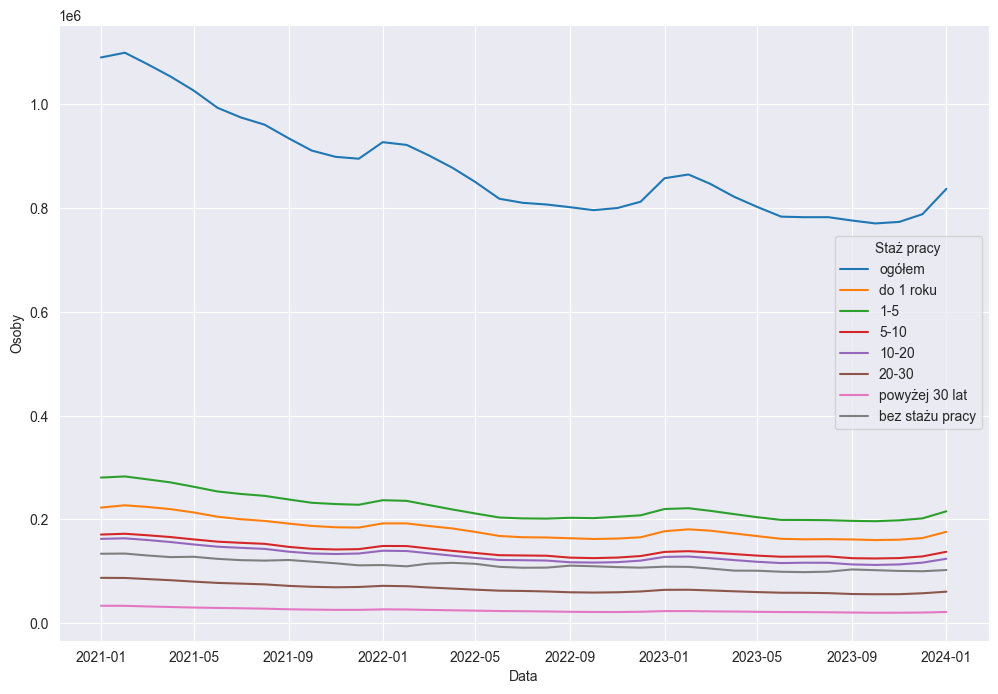

In [48]:
# Preparing line plot for number of unemployed people over the years 2021-2024
fig = plt.figure(figsize = [12,8])

sns.lineplot(
    x = "Data", 
    y = "Osoby",
    hue = "Staż pracy",
    data = work_experience[work_experience['Płeć'] == "ogółem"]
)

In [49]:
work_experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Miesiące    888 non-null    object        
 1   Płeć        888 non-null    object        
 2   Staż pracy  888 non-null    object        
 3   Year        888 non-null    int64         
 4   Osoby       888 non-null    int32         
 5   Month       888 non-null    int64         
 6   Data        888 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 52.0+ KB


Płeć       Staż pracy     
kobiety    1-5                128751.108108
           10-20               63332.351351
           20-30               25571.810811
           5-10                75951.594595
           bez stażu pracy     66376.081081
           do 1 roku          106413.027027
           ogółem             473104.567568
           powyżej 30 lat       6708.594595
mężczyźni  1-5                 95088.891892
           10-20               66917.756757
           20-30               41138.135135
           5-10                64377.243243
           bez stażu pracy     45430.432432
           do 1 roku           75281.702703
           ogółem             406060.972973
           powyżej 30 lat      17826.810811
ogółem     1-5                223840.000000
           10-20              130250.108108
           20-30               66709.945946
           5-10               140328.837838
           bez stażu pracy    111806.513514
           do 1 roku          181694.729730
     

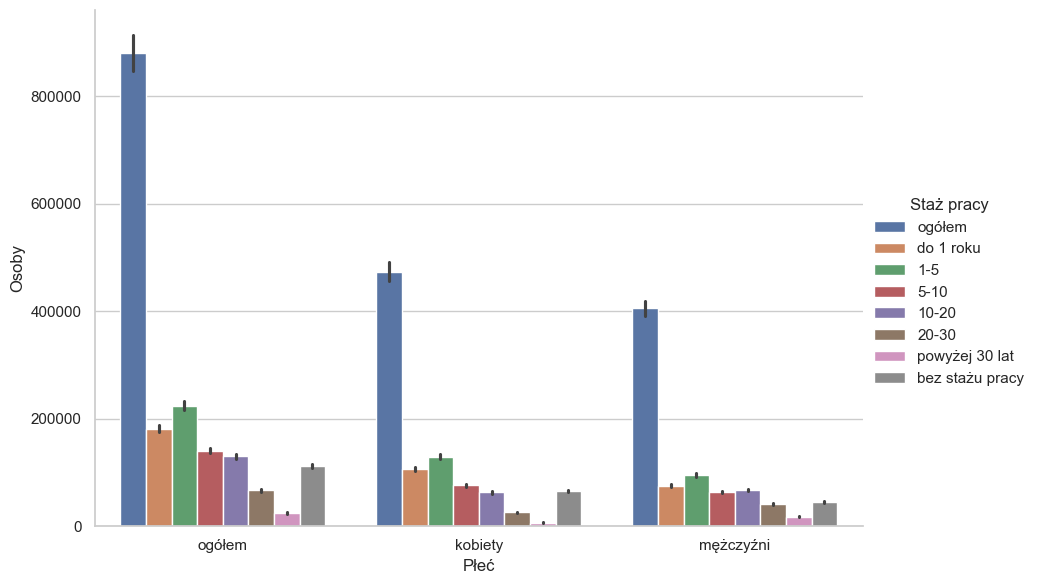

In [54]:
# Average/mean of number of unemployed people for each sex and work experience - bar plot
sns.set(style="whitegrid")
sns.catplot(data=work_experience, x="Płeć", y="Osoby", hue="Staż pracy", kind="bar", height=6, aspect=1.5)

# Group the data by gender and work experience, and calculate the mean
mean_by_gender_and_experience = work_experience.groupby(['Płeć', 'Staż pracy'])['Osoby'].mean()
print(mean_by_gender_and_experience)

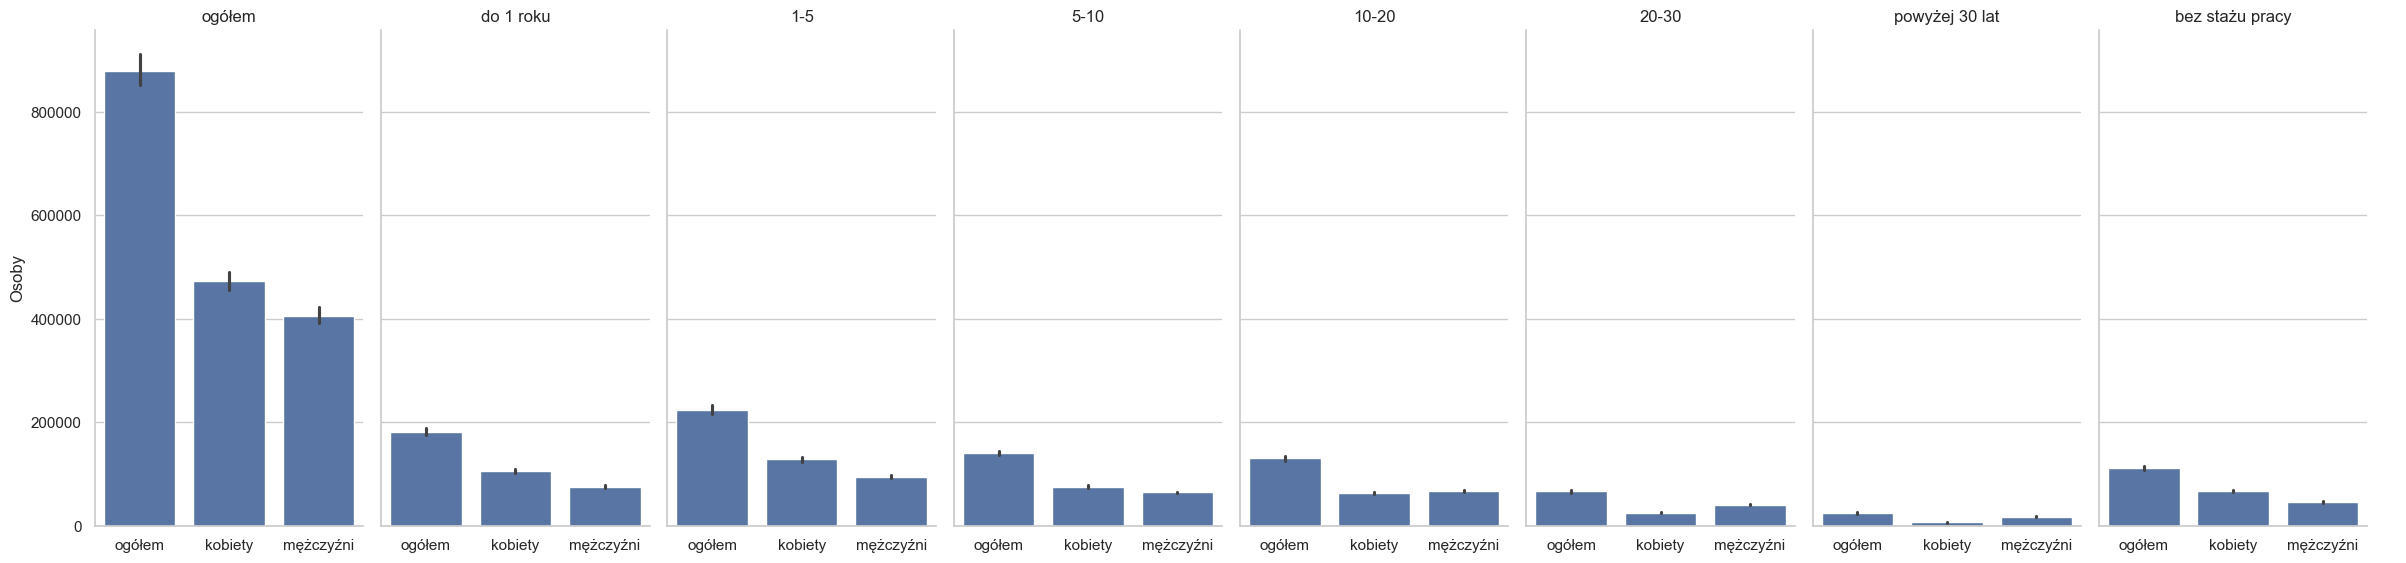

In [55]:
# Mean on different plot
g = sns.catplot(
    data=work_experience, x="Płeć", y="Osoby", col="Staż pracy",
    kind="bar", height=6, aspect=0.5
)
g.set_axis_labels("", "Osoby")
    
g.set_titles("{col_name}", wrap=True)